***Assignment 3: Graph Visualization***

This week's assignment is to:
1. Load a graph database of your choosing from a text file or other source. If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges.
2. Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing. You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package.
3. Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.
4. Please record a short video (~ 5 minutes), and submit a link to the video as part of your
homework submission.

Required Packages:

In [ ]:
import csv
import pandas as pd
import re,json,requests
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

Import the Dataset:

These datasets used for node classification and transfer learning are Twitch user-user networks of gamers who stream in a certain language. Nodes are the users themselves and the links are mutual friendships between them. Vertex features are extracted based on the games played and liked, location and streaming habits. Datasets share the same set of node features, this makes transfer learning across networks possible. These social networks were collected in May 2018. The supervised task related to these networks is binary node classification - one has to predict whether a streamer uses explicit language.

https://snap.stanford.edu/data/twitch-social-networks.html

In [ ]:
e=pd.read_csv("https://raw.githubusercontent.com/agersowitz/DATA_620/main/musae_ENGB_edges.csv")
targets=pd.read_csv("https://raw.githubusercontent.com/agersowitz/DATA_620/main/musae_ENGB_target.csv")
resp = requests.get("https://raw.githubusercontent.com/agersowitz/DATA_620/main/musae_ENGB_features.json")
features = json.loads(resp.text)

Add the nodes and edges to a graph database using NetworkX. The plot is extremely crowded and does not show much.

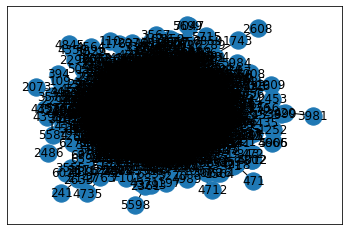

In [ ]:
nodes = (targets['new_id']).unique()
nodes=nodes.tolist()

G=nx.Graph()
G.add_nodes_from(nodes)


edge = e.to_records(index=False)
edges = list(edge)

G.add_edges_from(edges)

nx.draw_networkx(G)
plt.show()



Now we will get the diameter using the built in function in NetworkX. We will also get the shortest path between node 1 and node 1000 using the funcitons within NetworkX as well.

In [ ]:
 diam = nx.diameter(G)
 
 print(diam)

10

In [ ]:
short = nx.algorithms.shortest_path(G,1,24)
print(short)

nx.algorithms.average_shortest_path_length(G)


[1, 6716, 24]


3.6776157289097005

We can see from the output above that the diameter of this dataset is 10 nodes, the average shortest path is 3.678 and the shortest path between node 1 and node 24 is in the sequence [1, 6716, 24]. We will circle back and limit the graph database to only nodes that are in this list or are connected to these 2 nodes. Then we will visualize so we can better see what is going on with this subset of the graph.

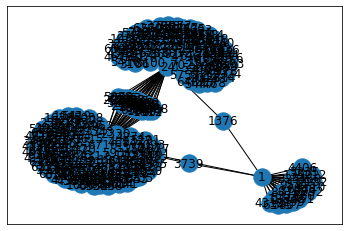

In [ ]:
filtered_edges1 = list(filter(lambda c: c[1] in short , edges))
filtered_edges0 = list(filter(lambda c: c[0] in short , edges))
filtered_edges = filtered_edges1+filtered_edges0
filtered_nodes = [item for t in filtered_edges for item in t]

def unique(list1):
    x = np.array(list1)
    return np.unique(x)

filtered_nodes=unique(filtered_nodes)
filtered_edges=unique(filtered_edges)

G2=nx.Graph()
G2.add_nodes_from(filtered_nodes)

G2.add_edges_from(filtered_edges)

nx.draw_networkx(G2)
plt.show()



We can see that nodes 3739 and 1376 are key connectors between node 1 and the other nodes along this path.